# Reproducing Balaban Exp1 CDA Study (2019) - G vs B

## Notes

In [1]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf

import sys
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\')
from cda_utils import get_epochs, get_CDA, prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Balaban-2019/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\Balaban-2019\\')
from events import get_specific_events
 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prep Data

Processing: 521.bdf...
Extracting EDF parameters from D:\CLNT\Data\Open Datasets\Balaban 2019\Data\Exp1_EEG\521.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1573375  =      0.000 ...  6145.996 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
['Fp1', 'AF3', 'F7', 'F3', 'P1', 'FCz', 'T7', 'C3', 'P5', 'PO7', 'P7', 'P3', 'POz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'PO8', 'P6', 'C4', 'T8', 'Fz', 'P2', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'Pz', 'EXG7', 'EXG8', 'Status']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper pas

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


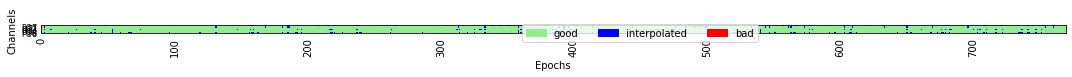

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[521.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 3.1077217350756126
[521.bdf] Adding Mean CDA Amp f

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

Dropped 23 epochs: 232, 390, 413, 416, 421, 424, 434, 460, 520, 531, 541, 552, 591, 592, 609, 645, 656, 692, 704, 709, 727, 744, 745


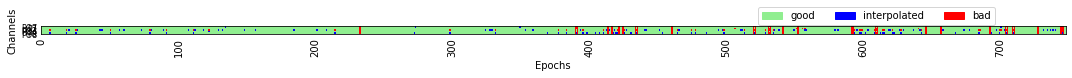

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[522.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 0.9919158400939476
[522.bdf] Adding Mean CDA Amp f

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

Dropped 82 epochs: 14, 30, 38, 41, 42, 49, 55, 58, 60, 82, 106, 108, 110, 122, 140, 142, 145, 203, 205, 207, 224, 225, 229, 261, 262, 265, 274, 275, 284, 294, 297, 311, 327, 336, 343, 352, 387, 389, 391, 392, 403, 404, 410, 420, 436, 443, 459, 461, 464, 479, 498, 507, 512, 513, 518, 519, 520, 529, 544, 548, 557, 565, 569, 571, 581, 600, 604, 606, 617, 622, 630, 658, 660, 671, 674, 677, 696, 697, 706, 708, 716, 729


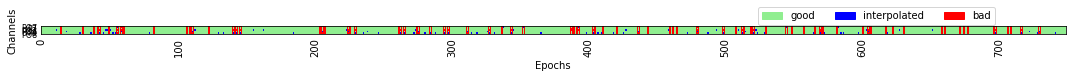

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[523.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 4.078213366987158
[523.bdf] Adding Mean CDA Amp fo

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=1


  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

Dropped 16 epochs: 83, 144, 150, 152, 159, 176, 189, 190, 253, 270, 384, 502, 576, 599, 613, 626


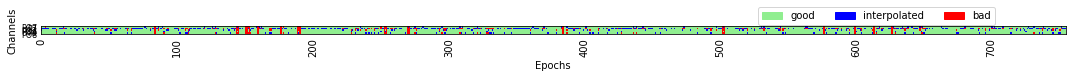

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[524.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 0.3833594017291814
[524.bdf] Adding Mean CDA Amp f

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

Dropped 60 epochs: 21, 76, 92, 121, 139, 156, 162, 186, 192, 216, 249, 267, 287, 298, 342, 360, 375, 391, 393, 400, 414, 429, 440, 443, 455, 460, 461, 503, 513, 515, 516, 519, 524, 528, 532, 543, 544, 547, 555, 558, 568, 577, 579, 613, 615, 631, 633, 634, 644, 651, 689, 691, 699, 704, 705, 707, 716, 734, 741, 758


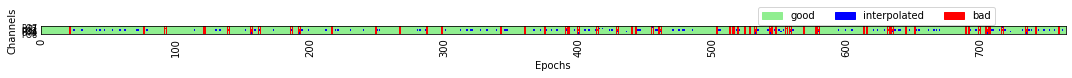

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[525.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 0.5905778835066702
[525.bdf] Adding Mean CDA Amp f

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=1


  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

Dropped 5 epochs: 97, 105, 169, 270, 392


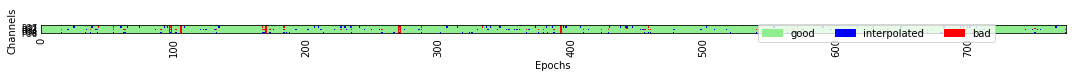

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[526.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 2.794568684618253
[526.bdf] Adding Mean CDA Amp fo

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


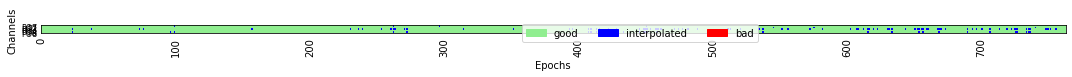

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[527.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 3.0623922878217895
[527.bdf] Adding Mean CDA Amp f

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

Dropped 91 epochs: 9, 21, 30, 47, 48, 50, 51, 53, 63, 69, 70, 105, 118, 120, 123, 132, 143, 148, 153, 166, 176, 183, 187, 189, 190, 221, 233, 239, 247, 253, 266, 267, 274, 279, 282, 283, 296, 300, 313, 316, 319, 321, 328, 331, 336, 343, 354, 357, 360, 412, 419, 422, 429, 432, 442, 458, 495, 506, 507, 513, 516, 519, 524, 527, 528, 540, 546, 548, 558, 581, 604, 605, 633, 637, 649, 676, 679, 687, 699, 703, 706, 708, 709, 711, 712, 715, 717, 718, 722, 725, 738


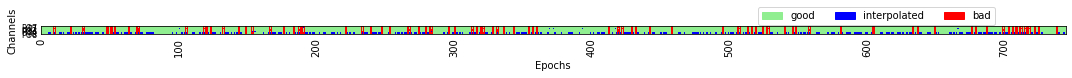

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[528.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -0.3584344133410384
[528.bdf] Adding Mean CDA Amp 

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


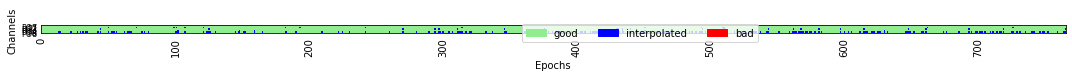

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[529.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 3.6949916299683703
[529.bdf] Adding Mean CDA Amp f

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


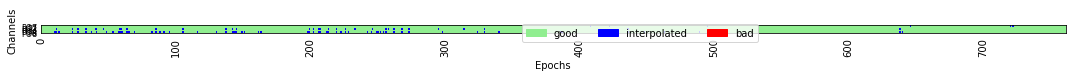

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[530.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 4.258495669425786
[530.bdf] Adding Mean CDA Amp fo

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

Dropped 56 epochs: 20, 31, 33, 90, 96, 142, 185, 213, 254, 288, 300, 301, 303, 324, 332, 338, 352, 387, 390, 404, 405, 425, 447, 453, 495, 527, 544, 548, 551, 573, 580, 584, 590, 592, 600, 602, 613, 631, 635, 641, 642, 647, 648, 668, 679, 684, 689, 693, 695, 697, 709, 710, 727, 728, 729, 734


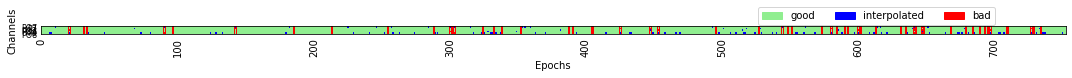

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[531.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -0.33150524218338395
[531.bdf] Adding Mean CDA Amp

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

Dropped 39 epochs: 14, 26, 27, 30, 34, 43, 65, 67, 70, 129, 168, 191, 203, 220, 238, 247, 274, 282, 284, 296, 320, 323, 343, 351, 354, 395, 446, 450, 454, 455, 458, 460, 527, 546, 547, 628, 630, 667, 760


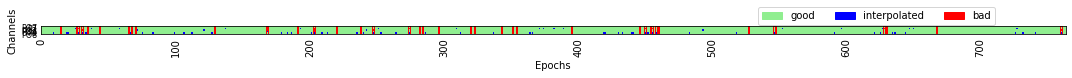

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[532.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 5.1316548537967
[532.bdf] Adding Mean CDA Amp for 

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

Dropped 54 epochs: 1, 36, 60, 63, 69, 72, 132, 155, 246, 285, 337, 366, 380, 393, 398, 411, 419, 425, 428, 439, 458, 478, 497, 509, 530, 532, 536, 561, 562, 567, 583, 593, 596, 599, 602, 606, 610, 613, 666, 669, 684, 690, 710, 722, 724, 726, 734, 739, 740, 741, 742, 757, 761, 763


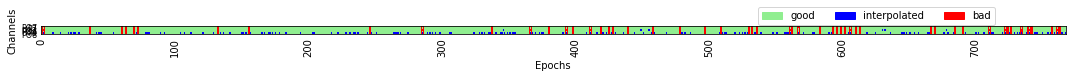

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[533.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 5.222711396933875
[533.bdf] Adding Mean CDA Amp fo

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=4


  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


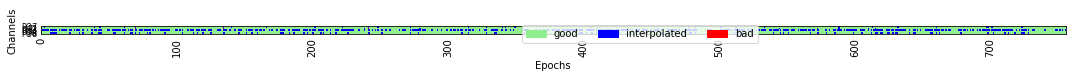

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[534.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 1.7249123620505507
[534.bdf] Adding Mean CDA Amp f

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


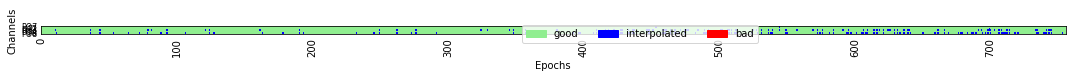

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[535.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 3.432387518365505
[535.bdf] Adding Mean CDA Amp fo

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

Dropped 1 epoch: 137


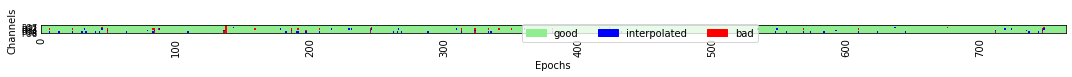

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[536.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 2.282581504158353
[536.bdf] Adding Mean CDA Amp fo

,Integrated_Shape,Separation_Shape,Integrated_Color,Separation_Color,left,right,good,bad,Integrated_Shape-left,Integrated_Shape-left-CDA,...,Separation_Color-right-good,Separation_Color-right-good-CDA,right-good-CDA,Separation_Color-right-bad,Separation_Color-right-bad-CDA,right-bad-CDA,checksum,notes,good-CDA,bad-CDA
521.bdf,185,204,205,176,390,380,626,144,88,0,...,63,0.711239,0.68371,14,-1.089517,-0.039571,1,,1.559008,1.125348
522.bdf,173,203,184,188,383,365,633,115,92,0,...,77,1.238702,1.770811,6,2.847446,2.139341,0,0,1.079870,1.39194
523.bdf,179,192,190,188,380,369,586,163,89,0,...,85,2.052839,0.523188,11,0.937248,0.320681,0,0,2.251394,2.460587
524.bdf,197,174,178,206,395,360,622,133,115,0,...,87,3.173148,2.368088,15,3.264891,2.881045,0,0,1.196397,1.251637
525.bdf,209,174,198,183,370,394,610,154,100,0,...,81,4.063769,3.106901,17,4.204765,3.021385,0,0,1.744836,1.770724
526.bdf,197,186,213,178,374,400,578,196,94,0,...,77,1.961189,1.660807,15,2.322961,1.356305,0,0,1.768442,1.495815
527.bdf,196,192,197,178,379,384,630,133,102,0,...,85,-0.999754,-1.304921,10,1.371261,-0.932855,1,0,0.879610,0.90973
528.bdf,201,174,178,192,358,387,629,116,89,0,...,72,3.630137,4.8555,19,4.541549,4.601267,0,0,1.852008,1.894694
529.bdf,199,178,199,190,370,396,595,171,105,0,...,85,2.26412,1.437722,16,2.307272,1.580244,1,0,2.322920,2.347456
530.bdf,190,192,210,170,394,368,662,100,97,0,...,74,5.776156,2.882541,9,4.825967,2.78451,1,0,1.629599,1.654348


In [4]:
#==================================================================
# General Variables
#==================================================================
study_id = 'Balaban2019-Exp1'

triggers = dict();

triggers['Integrated_Shape'] = [21] 
triggers['Separation_Shape'] = [22]
triggers['Integrated_Color'] = [23]
triggers['Separation_Color'] = [24]

triggers['left'] =  [32]  #[31]
triggers['right'] = [31]  #[32]

triggers['good'] = [50,60]   # YR: Why 2 triggers for good and 2 triggers for bad?!
triggers['bad'] =  [5,6] 

# Labels
conds = ['Integrated_Shape', 'Separation_Shape', 'Integrated_Color', 'Separation_Color']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['P8', 'PO8', 'PO4']
chan_left =  ['P7', 'PO7', 'PO3']

# Epoch Information
epoch_length = 4.2
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA info
cda_window = (0.8, 2.0)

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
#folderpath = '/Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp1_EEG/'
folderpath = 'D:\\CLNT\\Data\\Open Datasets\\Balaban 2019\\Data\\Exp1_EEG\\'
#filepath = folderpath + '536.bdf'
sep = '\\'

for filepath in glob.iglob(folderpath + '*.bdf'):
    filename = filepath[filepath.rfind(sep)+1:]
    print('Processing: ' + filename + '...')
   
    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_bdf(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Keep only EEG channels and reference
    #raw = raw.rename_channels({'EXG7':'A1', 'EXG8': 'A2'})
    raw = raw.drop_channels(ch_names=['EXG1','EXG2','EXG3','EXG4','EXG5','EXG6'])
    raw = raw.set_eeg_reference(ref_channels=['EXG7', 'EXG8'])
    raw = raw.set_channel_types({'EXG7': 'misc', 'EXG8': 'misc'})

    print(raw.info.ch_names)
    
    # Set Electrodes Locations
    # It's 32 channels, but it seems like they didn't use the "standard" Biosemi 32
    montage = mne.channels.make_standard_montage('biosemi64')
    raw.set_montage(montage)
    
    preproc = raw
    
    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = find_events(preproc)
        
    # Select Channels (to save time on cleaning)
    preproc = preproc.pick_channels(chan_right + chan_left)
    
    # Plot (visual check)
    #preproc.plot(events=events, block=True, lowpass=40)
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    specific_events = get_specific_events(events, conds, sides, perfs, triggers, internal_triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict
    
    # times, used for CDA mean amp report.
    times = epochs_dict[conds[0]][sides[0]][perfs[0]].times
    
    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)
    
    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
print('{} Subjects & {} Trials'.format(len(report), 2*np.sum([report[cond].sum() for cond in conds])))
report

## 3. Save / Load CDA

In [15]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz-recall.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

## 4. Plot CDA Data - Grand CDA Average

In [6]:
cda_all = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict_all.keys():
        perf = 'good'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2            
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

## Final CDA figure from Balaban 2019

Text(0.5, 0, '[s]')

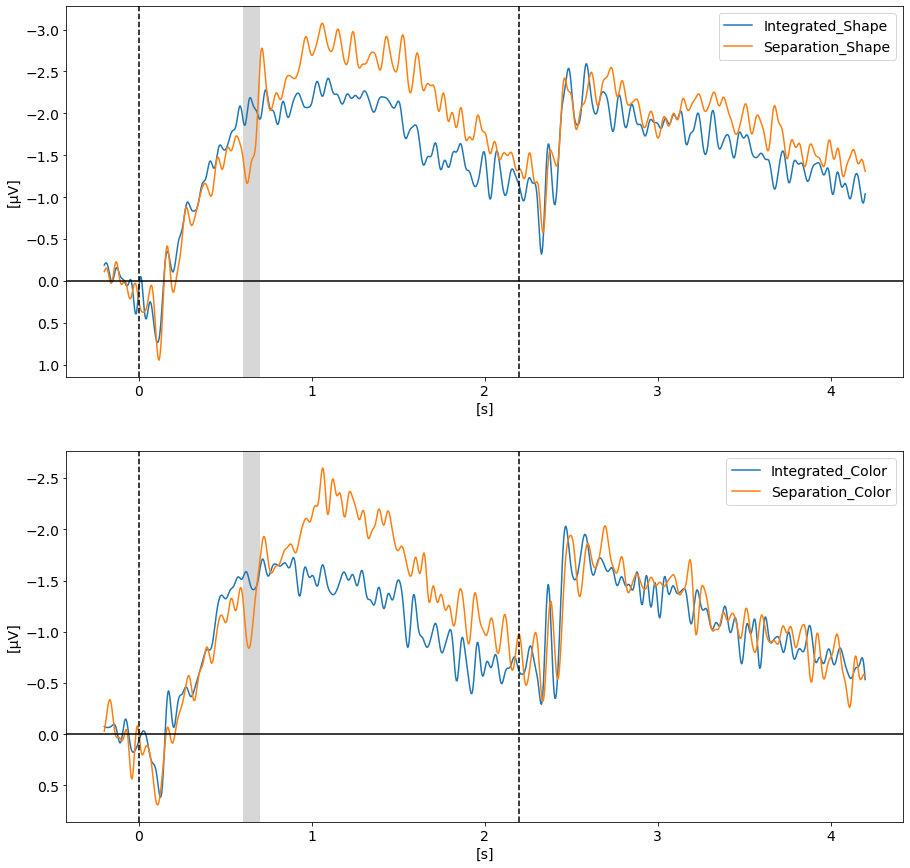

In [16]:
plt.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot((times), cda_all['Integrated_Shape'].mean(0) * -1e6, label='Integrated_Shape')
axs[0].plot((times), cda_all['Separation_Shape'].mean(0) * -1e6, label='Separation_Shape')
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axvline(x=2.2, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

axs[1].plot((times), cda_all['Integrated_Color'].mean(0) * -1e6, label='Integrated_Color')
axs[1].plot((times), cda_all['Separation_Color'].mean(0) * -1e6, label='Separation_Color')
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axvline(x=2.2, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

#plt.savefig("./Balaban-2019-Exp1_CDA-recall.png", dpi=300, format='png')

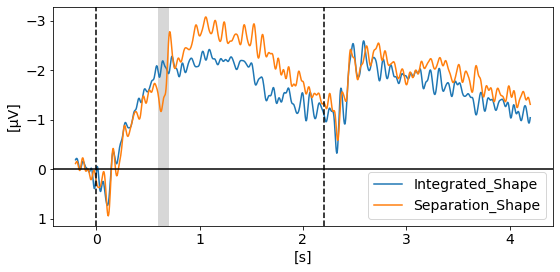

In [12]:
# Plot
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(8,4))

plt.plot((times), cda_all['Integrated_Shape'].mean(0) * -1e6, label='Integrated_Shape')
plt.plot((times), cda_all['Separation_Shape'].mean(0) * -1e6, label='Separation_Shape')
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=2.2, color='k', linestyle='--')
plt.axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')

plt.tight_layout()
fig.savefig("./{}-CDA1-recall.png".format(study_id), dpi=300, format='png')

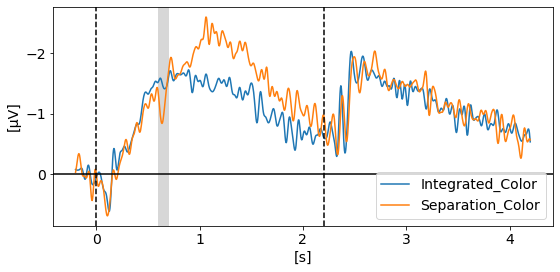

In [13]:
# Plot
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(8,4))

plt.plot((times), cda_all['Integrated_Color'].mean(0) * -1e6, label='Integrated_Color')
plt.plot((times), cda_all['Separation_Color'].mean(0) * -1e6, label='Separation_Color')
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=2.2, color='k', linestyle='--')
plt.axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')

plt.tight_layout()
fig.savefig("./{}-CDA2-recall.png".format(study_id), dpi=300, format='png')